## Week 1. Trapped Ions - Task 4
Author: QuNovaComputing, Inc.
- - -

In this task, we demonstrate the effect of the systematic two qubit gate error.
Fixing the RQC parameters, perturb the two qubit gate angle by fixed amount, $\Delta\Theta$,
we calculate the cross entropy benchmark fidelity, $F_{XEB}$ between the noisy cases ($|\Delta\Theta| > 0$) and the ideal case.

For the system with large number of qubits, the number of sampling is very small compare to the number of computational basis,

$$ S \ll 2^N $$

we forgo the list structure for the histogram result with length of $2^N$ which will be very sparse, instead, dictionary structure is utilized.
So we import the function `get_xeb_from_hist_large` which calculate the fidelity for histograms in dictionary forms.

In [1]:
import pickle
import matplotlib.pyplot as plt

from Week1_Trapped_Ions.src.utils import get_xeb_from_hist_large

As we did in the Task 3, we pre-executed the simulations and stored to the file by running `./task4_simulation.py`.
So here, we simply load the data from the file.

In [2]:
log_file = "./simulation_results/task4_simulation_result_large.txt"
with open(log_file, 'rb') as of:
    rd_file = pickle.load(of)
    num_qubits = rd_file['num_qubits']
    depth = rd_file['depth']
    num_shots = rd_file['num_shots']
    data = rd_file['data']
delta_thetas = [dt for dt in data]

Check the data included in the file..

In [3]:
print(f"num_qubits = {num_qubits}")
print(f"depth = {depth}")
print(f"num_shots = {num_shots}")
print(f"Delta Theta list = {str(delta_thetas[:3])[-1]} ... {delta_thetas[-1]}]")
print(f"(total {len(delta_thetas)} delta thetas)")
print("histograms :")
for i, dt in enumerate(data):
    hist = data[dt]
    print(f"Delta Theta = {dt} : ")
    print("\t{")
    for j, k in enumerate(hist):
        print(f"\t\t {'{0:b}'.format(k).rjust(num_qubits, '0')}: {hist[k]}")
        if j > 2:
            break
    print("\t\t...")
    print("\t}")
    if i > 2:
        break
print(f"... {len(delta_thetas)} histograms")

num_qubits = 15
depth = 1024
num_shots = 5000
Delta Theta list = ] ... 0.15393804002589973]
(total 100 delta thetas)
histograms :
Delta Theta = -0.15707963267948966 : 
	{
		 101000100100101: 0.0002
		 110001101100100: 0.0002
		 110100011010000: 0.0004
		 111011010011011: 0.0002
		...
	}
Delta Theta = -0.15393804002589986 : 
	{
		 011100110101111: 0.0002
		 001010011111001: 0.0002
		 001000110111001: 0.0004
		 011010001000100: 0.0002
		...
	}
Delta Theta = -0.15079644737231007 : 
	{
		 000011110101010: 0.0002
		 100000011011001: 0.0006000000000000001
		 100101100011011: 0.0004
		 111000101001010: 0.0002
		...
	}
Delta Theta = -0.14765485471872028 : 
	{
		 110110101000010: 0.0002
		 000000001101100: 0.0002
		 010110011111100: 0.0002
		 101110010010000: 0.0002
		...
	}
... 100 histograms


For each $\Delta \Theta$, calculate the cross entropy fidelity.

In [4]:
f_xebs = [get_xeb_from_hist_large(data[dt], data[0], num_qubits) for dt in data]

Make a plot for $F_{XEB}$ versus $\Delta\Theta$ in radian.

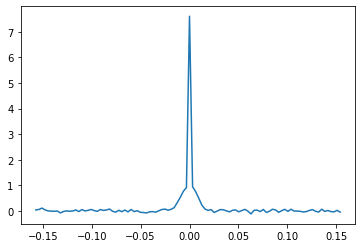

In [5]:
plt.plot(delta_thetas, f_xebs)